In [1]:
import pandas as pd
dataframe = pd.read_csv('/kaggle/input/eyediseases/JustRAIGS_Train_labels.csv', delimiter=';', encoding='utf-8')

dataframe = dataframe[['Eye ID', 'Final Label']]
diagnosis_dict_binary = {
    "NRG": 0,
    "RG": 1,

}
dataframe['Label'] = dataframe['Final Label'].map(diagnosis_dict_binary)
dataframe.head()

,Eye ID,Final Label,Label
0,TRAIN000000,NRG,0
1,TRAIN000001,NRG,0
2,TRAIN000002,NRG,0
3,TRAIN000003,NRG,0
4,TRAIN000004,NRG,0


In [2]:
df_NRG = (dataframe[dataframe['Final Label']=='NRG'])
df_RG = (dataframe[dataframe['Final Label']=='RG'])

In [3]:
print(df_NRG.shape)
print(df_RG.shape)

(98153, 3)
(3270, 3)


In [4]:
df_concat = pd.concat([df_NRG, df_RG])

In [5]:
dataframe = df_concat.sample(frac=1).reset_index(drop=True)

<Axes: ylabel='Final Label'>

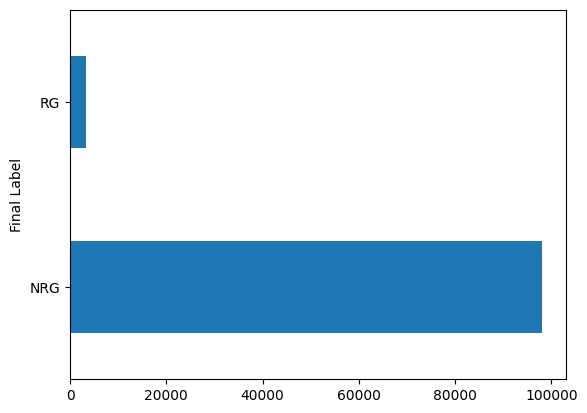

In [6]:
dataframe['Final Label'].value_counts().plot(kind='barh')

In [7]:
from sklearn.model_selection import train_test_split
train_val,test = train_test_split(dataframe,test_size = 0.15, stratify = dataframe['Final Label'])
train, val = train_test_split(train_val, test_size = 0.10, stratify = train_val['Final Label'])

print("For Training Dataset :")
print(train['Final Label'].value_counts(), '\n')
print("For Testing Dataset :")
print(test['Final Label'].value_counts(), '\n')
print("For Validation Dataset :")
print(val['Final Label'].value_counts(), '\n')

For Training Dataset :
Final Label
NRG    75087
RG      2501
Name: count, dtype: int64 

For Testing Dataset :
Final Label
NRG    14723
RG       491
Name: count, dtype: int64 

For Validation Dataset :
Final Label
NRG    8343
RG      278
Name: count, dtype: int64 



In [8]:
import os
import shutil

base_dir = ""

train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')
test_dir = os.path.join(base_dir,'test')

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
os.makedirs(val_dir)

if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)

In [9]:

import os
import shutil
import pandas as pd

# List of directories containing training datasets
dataset_directories = [
    '/kaggle/input/eyediseases/JustRAIGS_Train_0/0',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/1',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/2',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/3',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/4',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/5',
]

# Iterate over each dataset directory
for dataset_dir in dataset_directories:
    try:
        train = train

        # Iterate over each row in the CSV file
        for index, row in train.iterrows():
            diagnosis = row['Final Label']
            id_code = row['Eye ID'] + ".JPG"
            srcfile = os.path.join(dataset_dir, id_code)
            dstfile = os.path.join(train_dir, diagnosis)
            os.makedirs(dstfile, exist_ok=True)
            try:
                shutil.copy(srcfile, dstfile)
            except FileNotFoundError:
                # File not found in the current dataset directory
                # Continue to the next iteration to search in the next dataset directory
                continue
    except FileNotFoundError:
        # CSV file not found in the current dataset directory
        # Continue to the next dataset directory
        continue


In [10]:
# List of directories containing validation datasets
dataset_directories = [
    '/kaggle/input/eyediseases/JustRAIGS_Train_0/0',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/1',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/2',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/3',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/4',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/5',
]

# Iterate over each dataset directory
for dataset_dir in dataset_directories:
    try:
        val = val

        # Iterate over each row in the CSV file
        for index, row in val.iterrows():
            diagnosis = row['Final Label']
            id_code = row['Eye ID'] + ".JPG"
            srcfile = os.path.join(dataset_dir, id_code)
            dstfile = os.path.join(val_dir, diagnosis)
            os.makedirs(dstfile, exist_ok=True)
            try:
                shutil.copy(srcfile, dstfile)
            except FileNotFoundError:
                # File not found in the current dataset directory
                # Continue to the next iteration to search in the next dataset directory
                continue
    except FileNotFoundError:
        # CSV file not found in the current dataset directory
        # Continue to the next dataset directory
        continue



In [11]:
# List of directories containing  testing datasets
dataset_directories = [
    '/kaggle/input/eyediseases/JustRAIGS_Train_0/0',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/1',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/2',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/3',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/4',
#     '/kaggle/input/eyediseases/JustRAIGS_Train_1/5',
]

# Iterate over each dataset directory
for dataset_dir in dataset_directories:
    try:
        test = test

        # Iterate over each row in the CSV file
        for index, row in test.iterrows():
            diagnosis = row['Final Label']
            id_code = row['Eye ID'] + ".JPG"
            srcfile = os.path.join(dataset_dir, id_code)
            dstfile = os.path.join(test_dir, diagnosis)
            os.makedirs(dstfile, exist_ok=True)
            try:
                shutil.copy(srcfile, dstfile)
            except FileNotFoundError:
                # File not found in the current dataset directory
                # Continue to the next iteration to search in the next dataset directory
                continue
    except FileNotFoundError:
        # CSV file not found in the current dataset directory
        # Continue to the next dataset directory
        continue



In [12]:
# data augumentation

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Define the directory containing your dataset
data_dir = '/kaggle/working/train'

# Define the subdirectories for each class
class1_dir = os.path.join(data_dir, 'RG')
class2_dir = os.path.join(data_dir, 'NRG')

# # Count the number of images in each class
num_class1 = len(os.listdir(class1_dir))
num_class2 = len(os.listdir(class2_dir))

print(num_class1, num_class2)


num_augmented_samples = (max(num_class1, num_class2) -  min(num_class1, num_class2))/2

# Initialize the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Function to save augmented images to the input directory
def save_augmented_images(generator, output_dir, prefix, max_images):
    for i, batch in enumerate(generator):
        if i >= max_images:
            break
        img = batch[0]
        img = array_to_img(img[0])
        img.save(os.path.join(output_dir, f'{prefix}_{i}.jpg'))

# Flow from directory with specified augmentation parameters and save the augmented images
save_augmented_images(
    datagen.flow_from_directory(data_dir, batch_size=1, save_to_dir=class1_dir, save_prefix='aug', save_format='jpg'),
    class1_dir,
    'augmented_class1',
    num_augmented_samples)

num_class1 = len(os.listdir(class1_dir))
num_class2 = len(os.listdir(class2_dir))
print(num_class1, num_class2)

2024-02-24 09:53:57.462421: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 09:53:57.462545: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 09:53:57.589941: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


446 12834
Found 13280 images belonging to 2 classes.
12835 12834


In [13]:
num_class1 = len(os.listdir(class1_dir))
num_class2 = len(os.listdir(class2_dir))
print(num_class1, num_class2)

12835 12834


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = 'train'
val_path = 'val'
test_path = 'test'

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path, target_size=(224,224), shuffle = True)
val_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(val_path, target_size=(224,224),shuffle = True)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, target_size=(224,224), shuffle = False)

Found 25669 images belonging to 2 classes.
Found 1480 images belonging to 2 classes.
Found 2634 images belonging to 2 classes.


In [15]:
from tensorflow import lite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split

In [22]:
model = tf.keras.Sequential([
    layers.Conv2D(8, (3,3), padding="valid", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(16, (3,3), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(32, (4,4), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, (4,4), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(128, (4,4), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.15),
    layers.Dense(2, activation = 'softmax')
])

In [23]:
#EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.keras', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 8)       0         
 g2D)                                                            
                                                                 
 batch_normalization_5 (Bat  (None, 111, 111, 8)       32        
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 16)        0         
 g2D)                                                            
                                                      

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['acc'])

In [27]:
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=val_batches,
                    batch_size=128,
                    verbose = 1,
                    callbacks = [es,mc])

Epoch 1/5
803/803 [==============================] - 581s 719ms/step - loss: 0.1225 - acc: 0.9670 - val_loss: 0.1885 - val_acc: 0.9493
Epoch 2/5
803/803 [==============================] - 551s 687ms/step - loss: 0.0890 - acc: 0.9795 - val_loss: 0.1143 - val_acc: 0.9757
Epoch 3/5
803/803 [==============================] - 581s 724ms/step - loss: 0.0830 - acc: 0.9806 - val_loss: 0.1820 - val_acc: 0.9628
Epoch 4/5
803/803 [==============================] - 541s 673ms/step - loss: 0.0790 - acc: 0.9810 - val_loss: 0.1886 - val_acc: 0.9507
Epoch 5/5
803/803 [==============================] - 545s 679ms/step - loss: 0.0739 - acc: 0.9817 - val_loss: 0.1045 - val_acc: 0.9750


In [28]:
model.save('SimpleCNN.model')

In [29]:
loss, acc = model.evaluate_generator(test_batches, verbose=1)
print("Loss: ", loss)
print("Accuracy: ", acc)

/tmp/ipykernel_34/1501885792.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model.evaluate_generator(test_batches, verbose=1)


83/83 [==============================] - 98s 1s/step - loss: 0.1564 - acc: 0.9605
Loss:  0.1564108431339264
Accuracy:  0.9605163335800171


In [30]:
# Access the training history
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


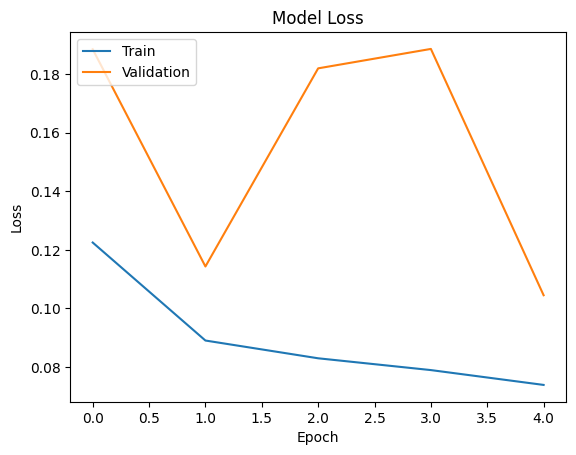

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

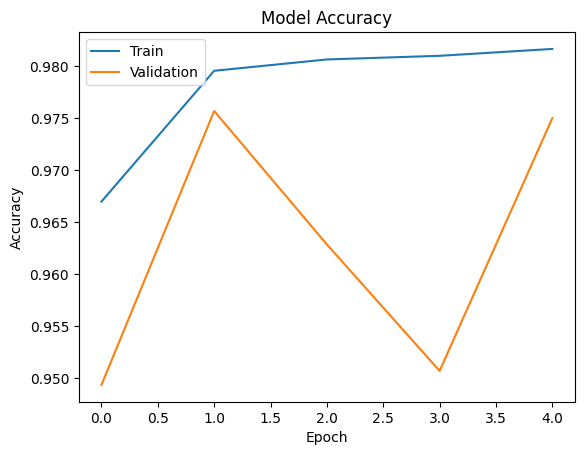

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()